In [37]:
from pathlib import Path
import pandas as pd
path = Path("profiles")
profile_fns = list(path.glob("*.txt"))

profiles = []
for profile_fn in profile_fns:
    df = pd.read_csv(profile_fn)
    image_fn = profile_fn.parts[-1].split(".")[0].split("_")[-1] + ".png"
    df["image_fn"] = image_fn
    profiles.append(df)
profiles = pd.concat(profiles).reset_index(drop=True)


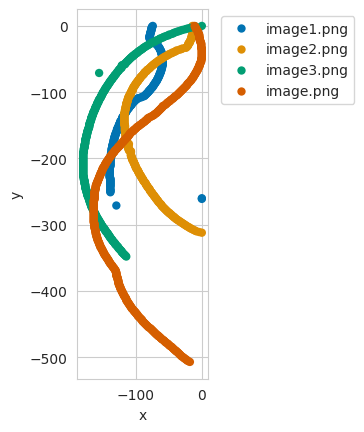

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from carps.analysis.utils import setup_seaborn


profiles["x"] = profiles.groupby("image_fn")["x"].transform(lambda x:-(x - x.min()))
profiles["y"] = profiles.groupby("image_fn")["y"].transform(lambda x: -(x - x.min()))

setup_seaborn()

ax = sns.scatterplot(data=profiles, x="x", y="y", hue="image_fn", palette="colorblind", linewidth=0)
ax.set_aspect("equal")
ax.legend(bbox_to_anchor=(1.05,1))